In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/restaurant-revenue-prediction/test.csv.zip
/kaggle/input/restaurant-revenue-prediction/sampleSubmission.csv
/kaggle/input/restaurant-revenue-prediction/train.csv.zip


In [2]:
data=pd.read_csv("/kaggle/input/restaurant-revenue-prediction/train.csv.zip")
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


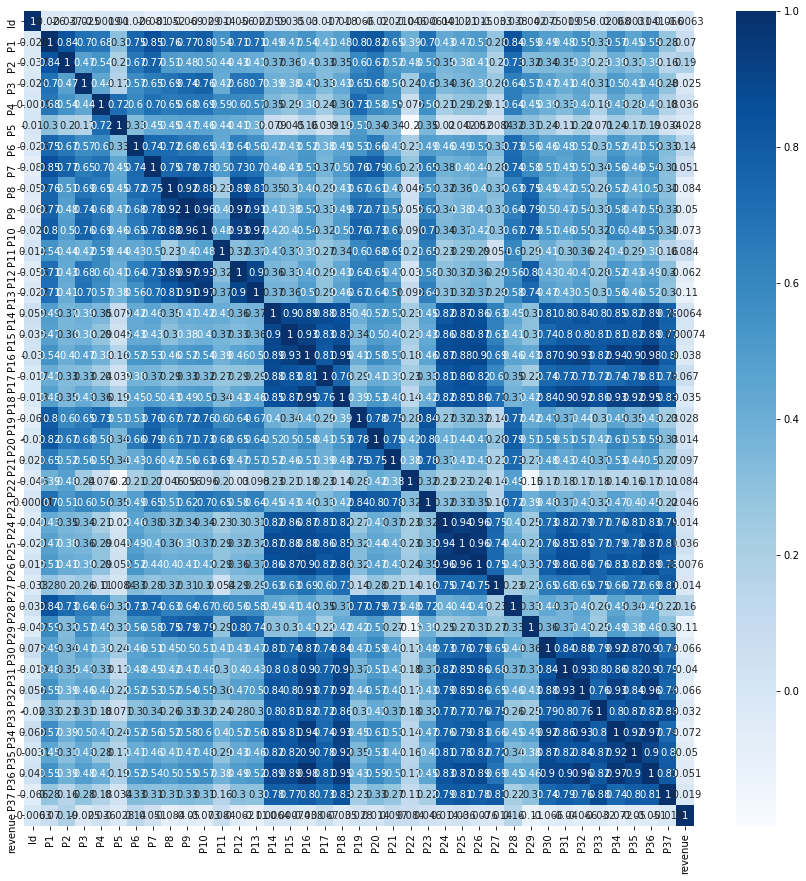

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap="Blues")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [5]:
data.Type.value_counts()

FC    76
IL    60
DT     1
Name: Type, dtype: int64

In [6]:
data['City Group'].value_counts()

Big Cities    78
Other         59
Name: City Group, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
one=OneHotEncoder()
data.City=le.fit_transform(data.City)
a=pd.DataFrame(one.fit_transform(data[['City Group']]).toarray())
b=pd.DataFrame(one.fit_transform(data[['Type']]).toarray())
data=pd.concat([data,a,b],axis=1)
data.drop(['Type','City Group'],axis=1,inplace=True)

In [8]:
data.head()

,Id,Open Date,City,P1,P2,P3,P4,P5,P6,P7,...,P34,P35,P36,P37,revenue,0,1,0,1,2
0,0,07/17/1999,31,4,5.0,4.0,4.0,2,2,5,...,5,4,3,4,5653753.0,1.0,0.0,0.0,0.0,1.0
1,1,02/14/2008,3,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,6923131.0,1.0,0.0,0.0,1.0,0.0
2,2,03/09/2013,10,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,2055379.0,0.0,1.0,0.0,0.0,1.0
3,3,02/02/2012,28,6,4.5,6.0,6.0,4,4,10,...,18,12,12,6,2675511.0,0.0,1.0,0.0,0.0,1.0
4,4,05/09/2009,14,3,4.0,3.0,4.0,2,2,5,...,3,4,3,3,4316715.0,0.0,1.0,0.0,0.0,1.0


In [9]:
def year(x):
    o=int(x[6:])
    return o
def month(x):
    o=int(x[3:5])
    return o
def day(x):
    o=int(x[0:2])
    return o
data['year']=data['Open Date'].apply(year)
data['month']=data['Open Date'].apply(month)
data['day']=data['Open Date'].apply(day)
data.drop("Open Date",axis=1,inplace=True)

In [10]:
data.head()

,Id,City,P1,P2,P3,P4,P5,P6,P7,P8,...,P37,revenue,0,1,0,1,2,year,month,day
0,0,31,4,5.0,4.0,4.0,2,2,5,4,...,4,5653753.0,1.0,0.0,0.0,0.0,1.0,1999,17,7
1,1,3,4,5.0,4.0,4.0,1,2,5,5,...,0,6923131.0,1.0,0.0,0.0,1.0,0.0,2008,14,2
2,2,10,2,4.0,2.0,5.0,2,3,5,5,...,0,2055379.0,0.0,1.0,0.0,0.0,1.0,2013,9,3
3,3,28,6,4.5,6.0,6.0,4,4,10,8,...,6,2675511.0,0.0,1.0,0.0,0.0,1.0,2012,2,2
4,4,14,3,4.0,3.0,4.0,2,2,5,5,...,3,4316715.0,0.0,1.0,0.0,0.0,1.0,2009,9,5


In [11]:
data.columns=[     'Id',    'City',      'P1',      'P2',      'P3',      'P4',
            'P5',      'P6',      'P7',      'P8',      'P9',     'P10',
           'P11',     'P12',     'P13',     'P14',     'P15',     'P16',
           'P17',     'P18',     'P19',     'P20',     'P21',     'P22',
           'P23',     'P24',     'P25',     'P26',     'P27',     'P28',
           'P29',     'P30',     'P31',     'P32',     'P33',     'P34',
           'P35',     'P36',     'P37', 'revenue',         0,         1,
               2,         3,         4,    'year',   'month',     'day']

In [12]:
x=data.drop(["Id","revenue"],axis=1)
y=data["revenue"]

In [13]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
xr,xt,yr,yt=train_test_split(x,y)

In [14]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBClassifier,XGBRFRegressor,XGBRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression,LinearRegression,SGDRegressor
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMRegressor

In [15]:
model=XGBRegressor(n_estimators=1000)
model.fit(x,y)
kfold=KFold(n_splits=10)
res=cross_val_score(model,x,y,cv=kfold)
res.mean()*100

-71.07111101954635

In [16]:
yp=model.predict(xt)

In [17]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(r2_score(yt,yp))
print(mean_absolute_error(yt,yp))
print(mean_squared_error(yt,yp))

0.9999999999998799
0.5428571428571428
0.9455357142857143


# TEST

In [29]:
test=pd.read_csv("/kaggle/input/restaurant-revenue-prediction/test.csv.zip")
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [30]:
test.City=le.fit_transform(test.City)
a=pd.DataFrame(one.fit_transform(test[['City Group']]).toarray())
b=pd.DataFrame(one.fit_transform(test[['Type']]).toarray())
test=pd.concat([test,a,b],axis=1)
test.drop(['Type','City Group'],axis=1,inplace=True)

In [31]:
test['year']=test['Open Date'].apply(year)
test['month']=test['Open Date'].apply(month)
test['day']=test['Open Date'].apply(day)
test.drop("Open Date",axis=1,inplace=True)

In [32]:
test.head()

,Id,City,P1,P2,P3,P4,P5,P6,P7,P8,...,P37,0,1,0,1,2,3,year,month,day
0,0,38,1,4.0,4.0,4.0,1,2,5,4,...,0,0.0,1.0,0.0,1.0,0.0,0.0,2011,22,1
1,1,27,3,4.0,4.0,4.0,2,2,5,3,...,0,0.0,1.0,0.0,0.0,1.0,0.0,2011,18,3
2,2,3,3,4.0,4.0,4.0,2,2,5,4,...,0,1.0,0.0,0.0,1.0,0.0,0.0,2013,30,10
3,3,26,2,4.0,4.0,4.0,2,3,5,4,...,0,0.0,1.0,0.0,0.0,1.0,0.0,2013,6,5
4,4,1,2,4.0,4.0,4.0,1,2,5,4,...,0,0.0,1.0,0.0,1.0,0.0,0.0,2013,31,7


In [33]:
test.columns=[     'Id',    'City',      'P1',      'P2',      'P3',      'P4',
            'P5',      'P6',      'P7',      'P8',      'P9',     'P10',
           'P11',     'P12',     'P13',     'P14',     'P15',     'P16',
           'P17',     'P18',     'P19',     'P20',     'P21',     'P22',
           'P23',     'P24',     'P25',     'P26',     'P27',     'P28',
           'P29',     'P30',     'P31',     'P32',     'P33',     'P34',
           'P35',     'P36',     'P37', 'revenue',         0,         1,
               2,         3,         4,    'year',   'month',     'day']

In [34]:
pred=test.drop('Id',axis=1)
yp=model.predict(x)
y1=pd.DataFrame(yp)

In [35]:
test=pd.concat([test,y1],axis=1)

In [36]:
test.columns=[     'Id',    'City',      'P1',      'P2',      'P3',      'P4',
            'P5',      'P6',      'P7',      'P8',      'P9',     'P10',
           'P11',     'P12',     'P13',     'P14',     'P15',     'P16',
           'P17',     'P18',     'P19',     'P20',     'P21',     'P22',
           'P23',     'P24',     'P25',     'P26',     'P27',     'P28',
           'P29',     'P30',     'P31',     'P32',     'P33',     'P34',
           'P35',     'P36',     'P37', 'revenue',         0,         1,
               2,         3,         4,    'year',   'month',     'day',
               'Prediction']

In [37]:
test.to_csv('sub.csv',columns=["Id","Prediction"],index=False)

In [38]:
sample=pd.read_csv("/kaggle/input/restaurant-revenue-prediction/sampleSubmission.csv")
sample.head()

,Id,Prediction
0,0,4453532.6
1,1,4453532.6
2,2,4453532.6
3,3,4453532.6
4,4,4453532.6


In [39]:
sample1=pd.read_csv("sub.csv")
sample1.head()

,Id,Prediction
0,0,5653753.0
1,1,6923132.0
2,2,2055378.4
3,3,2675511.2
4,4,4316714.5
